In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython import display


sns.set(style='ticks', context='talk')
plt.style.use("dark_background")

In [42]:
# Load Our Data (training set):

df_titanic_train = pd.read_csv('titanic_data/train.csv')
df_titanic_test = pd.read_csv('titanic_data/test.csv')

In [43]:
# Lets Look at our dataframe

df_titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [44]:
# Lets look at our test data fram:
df_titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [45]:
# Our data is split 70% for Training and 30% Testing - These are preset by Kaggle
# We can combine them and reshuffle them if we wanted to by:

df_titanic = pd.concat([df_titanic_train, df_titanic_test], ignore_index=True)

In [46]:
# Lets look at our combined Data Frame

df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Description of Columns:

We have some numerical, and some categorical columns in our data set. Our objective for this ML task
is to predict if some of these 'features' can tell us about the survival of one of the passengers.

Categorical: Survived, Pclass, Sex and Embarked
Numerical: Age, Fare, SibSp, Parch

SibSp -> Siblings and spouses on board
Parch -> Parents and children on board

/home/sharyarmemon/anaconda3/envs/gesar-linux/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

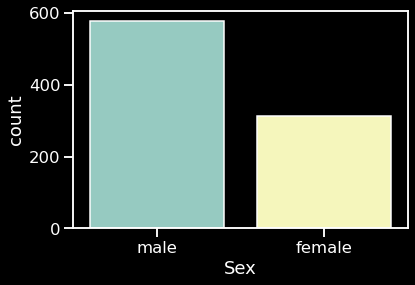

In [47]:
# How about we get some useful stats about our data set?
# We will focus on only the training set since it includes labels!

sns.countplot(df_titanic_train['Sex'])

/home/sharyarmemon/anaconda3/envs/gesar-linux/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

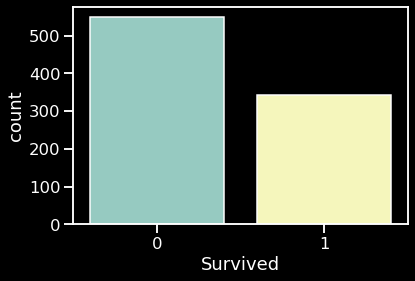

In [48]:
sns.countplot(df_titanic_train['Survived'])

<AxesSubplot:xlabel='Age', ylabel='Count'>

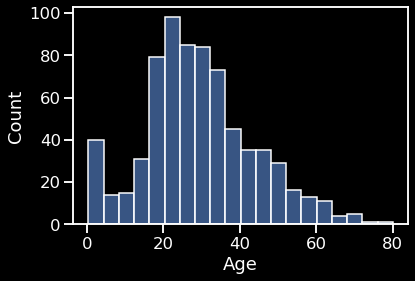

In [49]:
# We can see that there seems to be some connection between the gender of the passenger and the survival.

sns.histplot(df_titanic_train['Age'])

We see that the number of survivors seems very close to the number of female passengers.

Let's check if there is some kind of pattern:

In [50]:
women_survivors = sum(df_titanic_train.loc[df_titanic_train.Sex == 'female']['Survived'])
women_num = len(df_titanic_train.loc[df_titanic_train.Sex == 'female'])

man_survivors = sum(df_titanic_train.loc[df_titanic_train.Sex == 'male']['Survived'])
man_num = len(df_titanic_train.loc[df_titanic_train.Sex == 'male'])

print(f'Number of Woman On Board: {women_num}\nNumber of Women Who Survived: {women_survivors}/'
      f'\nWoman Survived Ratio: {women_survivors/women_num}\n\n\n')


print(f'Number of Men On Board: {man_num}\nNumber of Men Who Survived: {man_survivors}/'
      f'\nWoman Survived Ratio: {man_survivors/man_num}\n\n')

print(f'General Survival Rate: {sum(df_titanic_train.Survived)/len(df_titanic_train)}')

Number of Woman On Board: 314
Number of Women Who Survived: 233/
Woman Survived Ratio: 0.7420382165605095



Number of Men On Board: 577
Number of Men Who Survived: 109/
Woman Survived Ratio: 0.18890814558058924


General Survival Rate: 0.3838383838383838


## Some Patterns:

We can already see that about 70% of the woman on the ship survived. This sets up a baseline for us.
We can be reasonably certain that if a given passenger was a woman, she was likely to survive. And
vice versa for woman.

Our machine learning model should atleast be better than this rather simple guess?

In [51]:
# Now lets figure out, is our data complete and is there missing information?
# We will do this for both training and testing data

print('Info on Training Set:')
df_titanic_train.info()

print('*'*80)
print('Info on Test Set:')
df_titanic_test.info()

Info on Training Set:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
********************************************************************************
Info on Test Set:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       

We can see that we have missing values in a few columns above. Most noticeably in cabin.

We also have a few missing values in age.

Given what we know about the data set, we can make a few sound assumptions now:
1. Ticket should not have any correlation except by random chance to survival.
2. PassengerID is simply the default index of the passengers and does not hold meaningful information.
3. Names may and or may not be useful. Not 100% certain. We could potentially try to extract titles however
that may already be conveyed within the sex column to some extent.
4. Cabin column has lots of missing values. Should be dropped and not used to make any predictions.

We can choose to do a lot of feature engineering such as some ideas below:

* Create age ranges with bins to turn the numerical feature into a categorical one.
* Create a fare range feature with bins to turn it into a categorical one as well
* Use presence of last names as a feature to see if families or individuals were more likely to survive.

I will only be doing the first two here today for time and simplicity's sake.


In [52]:
# Lets start by dropping un-needed columns/features:

df_titanic_train.drop(['Ticket','Cabin', 'PassengerId'], axis=1, inplace=True)
df_titanic_test.drop(['Ticket', 'Cabin', 'PassengerId'], axis=1, inplace=True)
df_titanic.drop(['Ticket','Cabin', 'PassengerId'], axis=1, inplace=True)



In [53]:
# Lets deal with missing values within our columns first:
# How many missing values do we have in each column?
print("Information regarding Training Set - Missing Values:")
print(df_titanic_train.isnull().sum())

print("Information regarding Testing Set - Missing Values:")
print(df_titanic_test.isnull().sum())

print("Information regarding Entire Set - Missing Values:")
print(df_titanic.isnull().sum())
print('*'*40)
# We can see that we have missing values in three columns: Age,Fare and Embarked.

# A sklearn imputer allows us to fill those values based on a preset strategy.
# In the case of Embarked, we will use the mode values to fill the missing.
# In the case of Age, Fare we will use the median to fill it. Age should be whole numbers...
from sklearn.impute import SimpleImputer

emb_imp = SimpleImputer(strategy='most_frequent')

# Train the imputer on the entire data set:
df_titanic[['Embarked']] = emb_imp.fit_transform(df_titanic[['Embarked']])

# Update columns in test and training DFs:
df_titanic_train[['Embarked']] = emb_imp.transform(df_titanic_train[['Embarked']])
df_titanic_test[['Embarked']] = emb_imp.transform(df_titanic_test[['Embarked']])

# Train a new imputer for fare and age based on median:
age_fare_imputer = SimpleImputer(strategy='median')
df_titanic[['Age','Fare']] = age_fare_imputer.fit_transform(df_titanic[['Age','Fare']])

df_titanic_train[['Age','Fare']] = age_fare_imputer.transform(df_titanic_train[['Age','Fare']])
df_titanic_test[['Age','Fare']] = age_fare_imputer.transform(df_titanic_test[['Age','Fare']])

# Sanity check to ensure the values have been updated:
print('Missing values after imputer application - Training Set:\n')
print(df_titanic_train.isnull().sum())
print('*'*40)
print('Missing values after imputer application - Testing Set:\n')
print(df_titanic_test.isnull().sum())


Information regarding Training Set - Missing Values:
Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64
Information regarding Testing Set - Missing Values:
Pclass       0
Name         0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64
Information regarding Entire Set - Missing Values:
Survived    418
Pclass        0
Name          0
Sex           0
Age         263
SibSp         0
Parch         0
Fare          1
Embarked      2
dtype: int64
****************************************
Missing values after imputer application - Training Set:

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
****************************************
Missing values after imputer application - Testing Set:

Pclass      0
Name        0
Sex         0
Age         0
SibSp

Now that we have dealt with the missing values, lets encode our features into appropriate formats.

### Encoding Features:

We also want to convert our categorical features either into a dummy variable encoding,
One hot encoding, or ordinal encoding
ML algorithms like numbers, not words.

For more info about this: https://machinelearningmastery.com/one-hot-encoding-for-categorical-data/

In [54]:
# Ordinal encoding for sex and embarked. Ordinal encoding turns strings to 0,1,2 etc. This is only useful when you have
# a few categorical variable values that keep occurring.
from sklearn.preprocessing import OrdinalEncoder

emb_sex_ordinal_encoder = OrdinalEncoder()

# fit it on the entire data set and transform each set as well.
df_titanic[['Sex','Embarked']] = emb_sex_ordinal_encoder.fit_transform(df_titanic[['Sex','Embarked']])
df_titanic_test[['Sex','Embarked']] = emb_sex_ordinal_encoder.transform(df_titanic_test[['Sex','Embarked']])
df_titanic_train[['Sex','Embarked']] = emb_sex_ordinal_encoder.transform(df_titanic_train[['Sex','Embarked']])

In [70]:
# Convert float types to int types where needed:
df_titanic_train = df_titanic_train.astype({'Survived':'int32','Sex':'int32','Embarked':'int32', 'Age':'int32'})
df_titanic_test = df_titanic_test.astype({'Sex':'int32','Embarked':'int32', 'Age':'int32'})

We have now filled in missing values and converted some of our categorical variables into a numerical form.

The next step is understanding our data to see if further feature engineering maybe useful?
Lets begin with age and fare. Since this is a relatively small data set, it might be useful to group those values
into bins that can then be used as categorical variables.

The logic behind this is, are certain age groups more likely to survive such as infants vs elderly? Are rich people
who may have paid a higher fare more likely to have survived?

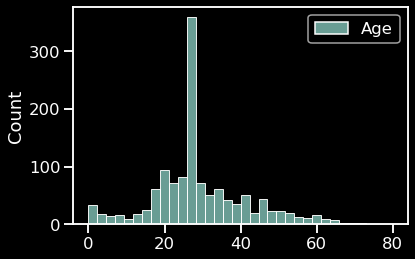

In [78]:
# Lets see a distribution of ages in our data set:
sns.histplot(df_titanic[['Age']])

# Lets divide up the age groups into bins:
age_categorical, bins = pd.cut(df_titanic.Age, bins=4, labels=[0,1,2,3], retbins=True)


In [83]:
print(f'Categorical Age Counts:\n{age_categorical.value_counts()}')

# use the bins we created to create new columns in each of the dfs to add a new column:
for df in [df_titanic,df_titanic_train,df_titanic_test]:
    df[['Cat_Age']] = pd.cut(df.Age, bins=bins, labels=[0,1,2,3])

Categorical Age Counts:
1    836
0    249
2    192
3     32
Name: Age, dtype: int64


              Fare
count  1309.000000
mean     33.281086
std      51.741500
min       0.000000
25%       7.895800
50%      14.454200
75%      31.275000
max     512.329200


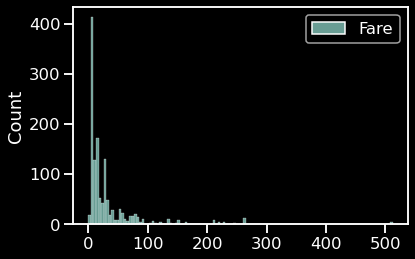

In [104]:
sns.histplot(df_titanic[['Fare']])
print(df_titanic[['Fare']].describe())

# We can see that we have a wide range of values when it comes to fares. Lets divide them up into bins but we should
# do this with manually defined bins based on quantiles

bins_fare = [0.0,8.0, 15.0, 40, 600]

for df in [df_titanic, df_titanic_train, df_titanic_test]:
    df[['Fare_Cat']] = pd.cut(df.Fare, bins=bins_fare, labels=[0,1,2,3])

We are alright for some basic feature engineering now. Lets try some algorithms to see how well they
perform. We will use a strategy called Stratified K Fold.

Read more on sklearn's website:
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html
